In [1]:
import datetime

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#read in
demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
leading = pd.read_csv("./data/LEADINGCAUSESOFDEATH.csv", usecols=['A_Wh_BirthDef','A_Bl_BirthDef', 'A_Ot_BirthDef', 'A_Hi_BirthDef'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality', 'IM_Postneonatal', 'IM_Neonatal'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Recent_Drug_Use'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])

In [3]:
#merge
full = pd.concat([demographics, summary,leading, measure, vunerable,risk], axis=1, join="inner")
selected = full.copy()
selected.drop('CHSI_County_Name', axis=1, inplace=True)
selected.drop('CHSI_State_Name', axis=1, inplace=True)
selected.drop('State_FIPS_Code', axis=1, inplace=True)
selected.drop('County_FIPS_Code', axis=1, inplace=True)
#selected.drop('A_Wh_BirthDef', axis=1, inplace=True)
#selected.drop('A_Bl_BirthDef', axis=1, inplace=True)
#selected.drop('A_Ot_BirthDef', axis=1, inplace=True)
#selected.drop('A_Hi_BirthDef', axis=1, inplace=True)
selected.drop('Infant_Mortality', axis=1, inplace=True)

In [4]:
selected.info()
selected.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 17 columns):
Health_Status      3141 non-null float64
Unhealthy_Days     3141 non-null float64
A_Wh_BirthDef      3141 non-null int64
A_Bl_BirthDef      3141 non-null int64
A_Ot_BirthDef      3141 non-null int64
A_Hi_BirthDef      3141 non-null int64
Premature          3141 non-null float64
Under_18           3141 non-null float64
Over_40            3141 non-null float64
IM_Neonatal        3141 non-null float64
IM_Postneonatal    3141 non-null float64
Recent_Drug_Use    3141 non-null int64
Toxic_Chem         3141 non-null int64
Obesity            3141 non-null float64
High_Blood_Pres    3141 non-null float64
Smoker             3141 non-null float64
Diabetes           3141 non-null float64
dtypes: float64(11), int64(6)
memory usage: 417.2 KB


,Health_Status,Unhealthy_Days,A_Wh_BirthDef,A_Bl_BirthDef,A_Ot_BirthDef,A_Hi_BirthDef,Premature,Under_18,Over_40,IM_Neonatal,IM_Postneonatal,Recent_Drug_Use,Toxic_Chem,Obesity,High_Blood_Pres,Smoker,Diabetes
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.00000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000
mean,-221.227889,-187.741897,-771.249602,-1027.079911,-1098.359758,-1058.209806,5.445782,-23.668609,-44.669214,-97.552340,-101.27886,5323.731614,1.411760e+06,-307.284241,-559.874849,-292.487902,-142.517765
std,460.837341,423.142860,520.738729,297.163582,122.352747,240.778913,89.329406,178.062926,224.274166,323.301286,325.16397,18738.553988,1.022878e+07,516.246132,568.622294,508.390227,381.651636
min,-1111.100000,-1111.100000,-2222.000000,-2222.000000,-2222.000000,-2222.000000,-2222.200000,-2222.200000,-2222.200000,-2222.200000,-2222.20000,2.000000,-2.222000e+03,-1111.100000,-1111.100000,-1111.100000,-1111.100000
25%,8.900000,4.500000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,10.200000,2.900000,1.100000,2.900000,1.30000,548.000000,0.000000e+00,-1111.100000,-1111.100000,-1111.100000,5.000000
50%,14.600000,5.700000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,11.700000,4.300000,1.500000,4.200000,2.30000,1319.000000,4.783100e+04,21.700000,-1111.100000,20.300000,7.000000
75%,19.400000,6.600000,17.000000,-1111.000000,-1111.000000,-1111.000000,13.200000,6.000000,2.100000,5.700000,3.20000,3573.000000,5.662850e+05,25.800000,26.100000,25.100000,9.100000
max,47.700000,12.600000,57.000000,38.000000,47.000000,52.000000,23.500000,14.500000,9.100000,18.800000,14.20000,665392.000000,4.987494e+08,42.600000,47.100000,46.200000,20.800000


In [5]:
target = pd.DataFrame(full, columns=["Infant_Mortality"])
X_train, X_test, y_train, y_test = train_test_split(selected, target, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2512, 17)
(2512, 1)
(629, 17)
(629, 1)


In [6]:
#m = KNeighborsRegressor(n_neighbors=3)
m = linear_model.LinearRegression()
#m = linear_model.LassoLars(alpha=.1)
model = m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(predictions.shape)

(629, 1)


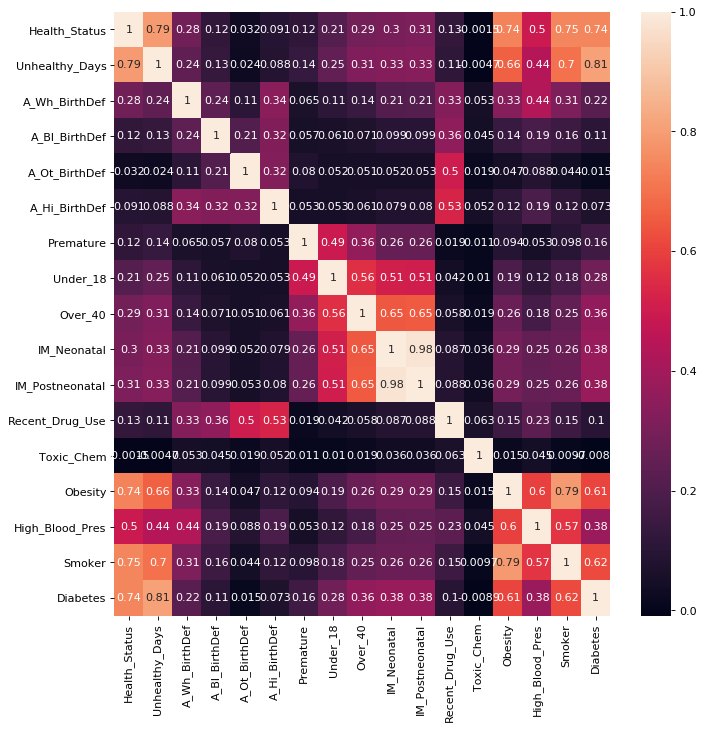

In [7]:
corr = selected.corr()
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='b')
sns.heatmap(corr, annot=True)

(0, 25)

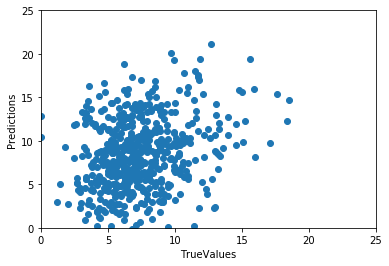

In [14]:
plt.scatter(y_test.values, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.xlim(0, 25)
plt.ylim(0, 25)

In [15]:
model.score(X_test, y_test)

0.8976053972338758

In [16]:
print(X_test.shape)

(629, 19)
